In [5]:
import  numpy as np
import pandas as pd

In [ ]:
#bài toán mà tụi em làm là phân loại email spam or ham dựa trên nội dung của email

In [6]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [7]:
#Ban đầu em đọc vào file csv thì có được dataframe như bên dưới gồm có 5 columns, v1,v2, và 3 columns không có tên
#Nhưng mà khi em vào kiểm tra dữ liệu thì chỉ có 2 cột là có giá trị là v1 và v2 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()
df.shape
#Sau khi kiểm tra thông tin data thì em thấy 3 column không có tên này có lượng dòng data chiếm số ít 
#khoảng 50 dòng / 5572 dòng data
#Và bài toán của em thì chỉ dựa vào nội dung email đễ xác định phân nhãn nên em quyết định loại bỏ 3 cột này

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

In [9]:
#Loại bỏ 3 cột Unamed 2 3 4
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [10]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Sau khi loại bỏ 3 cột unamed thì em đổi tên cột columns v1 thành target , v2 thành text
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4022,ham,Well. Balls. Time to make calls
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...
2939,spam,You have 1 new message. Please call 08712400200.
4807,ham,What's up my own oga. Left my phone at home an...
2310,spam,You have won a Nokia 7250i. This is what you g...


In [12]:
#Em chuyển đổi label của target về dạng số , em sử dụng labelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#Sau đó em kiểm tra xem có dòng dữ liệu nào bị null không
df.isnull().sum()


target    0
text      0
dtype: int64

In [16]:
#Kiểm tra xem có dòng nào dữ liệu bị lặp không
df.duplicated().sum()

403

In [17]:
#Vì có 403 dòng bị lặp nên em sẽ loại bỏ bớt , ở đây em sẽ loại bỏ những dòng bị lặp và chỉ giữ
#lại giá trị lặp đầu tiên
df = df.drop_duplicates(keep='first')

In [18]:
#Sau khi giảm xong em kiểm tra lại lặp thì nó = 0 
df.duplicated().sum()

0

In [19]:
df.shape
#Và kiểm tra lại số lượng dòng trong df , ban đầu của nó là ((5572, 5))

(5169, 2)

In [20]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

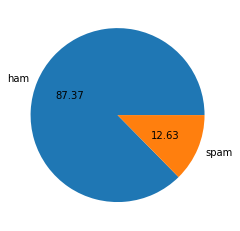

In [21]:
#Em sử dụng thư viện matplot đễ vẻ biểu đồ , đễ so sánh số lượng email có label là ham và spam .
#Thì em nhận thấy là số email có label là ham chiến phần lớn , và spam chỉ chiếm phần nhỏ , nên dữ liệu này e thấy hơi bị lệch
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#Sau đó em thêm thư viện nltk đễ sử lý ngôn ngữ tự nhiên
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\TRAN THAI
[nltk_data]     HIEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#Em tạo ra 3 columns mới , 3 columns này đều dựa trên columns[Text] (Nội dung của email) 
#Columns num_characters là số lượng ký tự của email
df['num_characters']= df['text'].apply(len)
#Column num_words là số lượng từ trong một câu của columns text 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#Column num_sentences Là số lượng câu riêng lẻ của columns text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

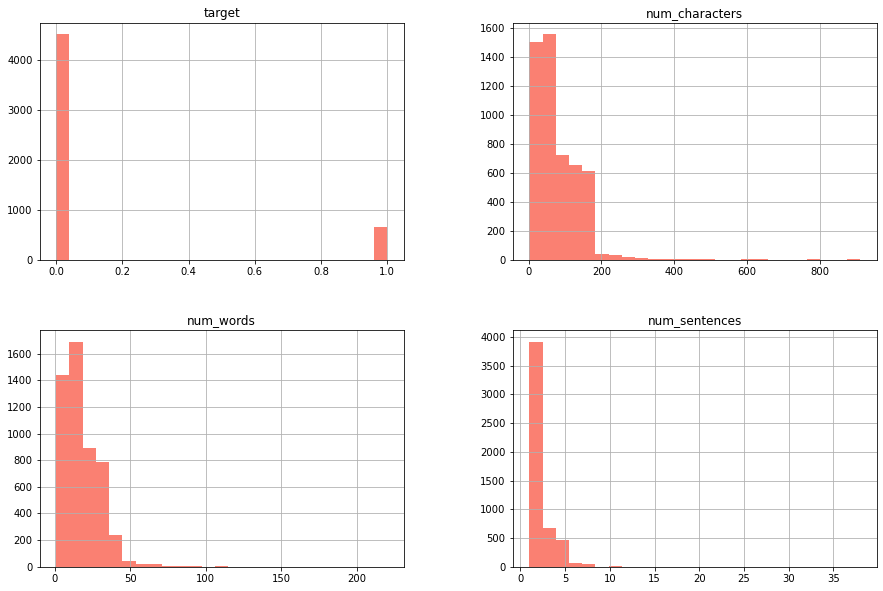

In [25]:
#Từ đó em thống kê ra thành 4 bảng với số lượng và khoảng giá trị của 4 columns dạng số là target , num_characters
#num_words,#num_sentences
df.head()
df.hist(bins=25,figsize=(15,10),color='salmon')

plt.show()

In [26]:
#Sau đó em sử dụng describe()
#Describe dùng để thống kế 3 cột với một số dữ liệu gồm
#Số lượng , trung bình , độ lệch chuẩn , giá trị tối thiểu , giá trị tối đa,
#3 giá trị phần trăm percentiles giúp hiểu rõ hơn về cách dữ liệu phân bố
#Gía trị max
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#Một số thông số của nhãn là Ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#Một số thông số của hãn là Spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
#Sau đó em sử dụng thư viện seaborn đễ vẽ một số biểu đồ so sánh 
#Của 3 columns mà em mới thêm với 2 label là spam và ham
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

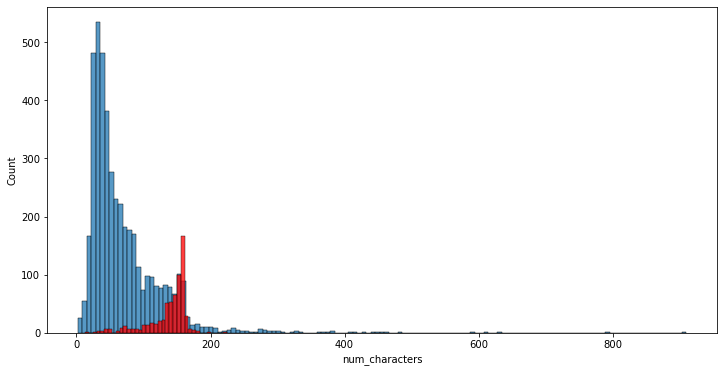

In [30]:
#Vẽ biểu đồ histogram 
#Với ham là màu xanh , và spam là màu đỏ
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

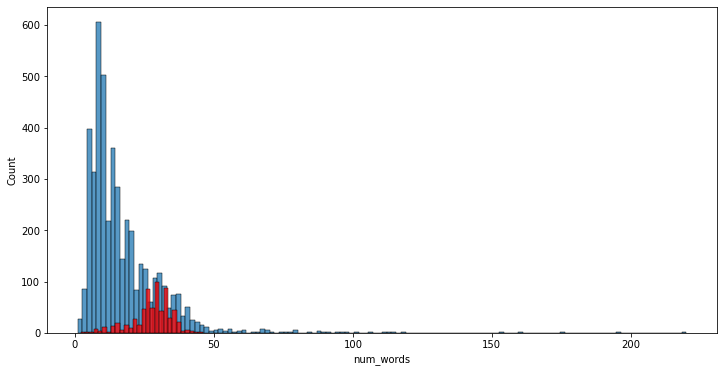

In [31]:
#Vẽ biểu đồ histogram 
#Với ham là màu xanh , và spam là màu đỏ
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

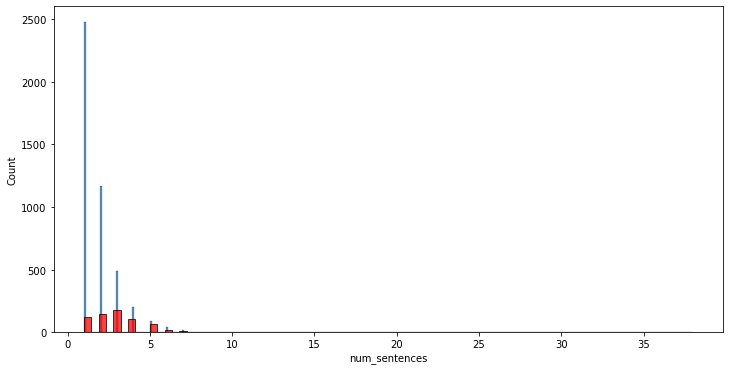

In [32]:
#Vẽ biểu đồ histogram 
#Với ham là màu xanh , và spam là màu đỏ
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')


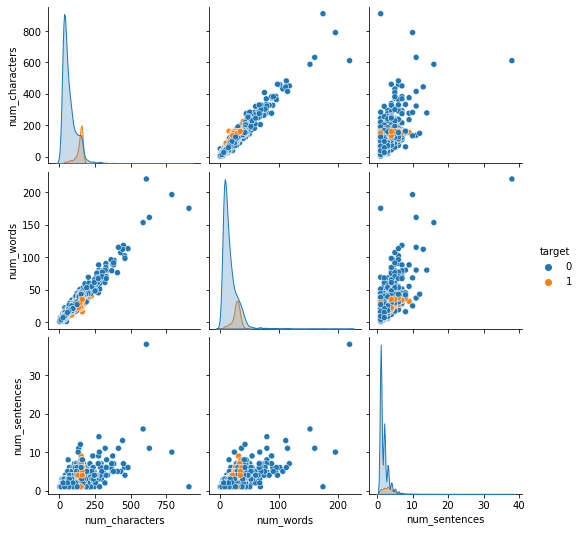

In [33]:
sns.pairplot(df,hue='target')

In [ ]:
#3 columns mà em thêm vào là 3 cái đặc trưng của một email là spam or ham 
#Thì em thấy sự phân của columns num_word và num_characters thì có sự rõ ràng hơn giữa 2 nhãn spam và ham
#Còn columns num_sentences thì phân bố gần như là giống nhau

In [34]:
df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

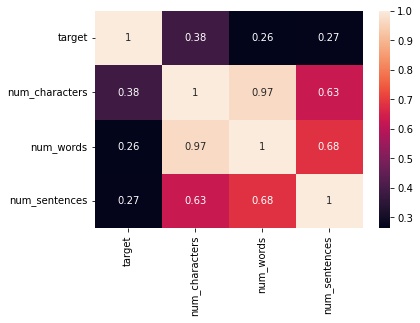

In [35]:
sns.heatmap(df.corr(),annot=True)

In [36]:
#Ở đây em dowload stopword, stop word là những từ tiếng anh phổ biến ,nhưng nó không mang quá nhiều ý nghĩa
#Ở đây em sẽ tải xuống 1 list từ stopword , và cố gắng loại bỏ những từ trong nội dung khi trùng với các từ stopword này
#để giảm độ phức tạp của nội dung email
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\TRAN THAI
[nltk_data]     HIEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
#Và em import vào một hàm gồm tất cả các dấu câu trong tiếng anh , việc này được dùng đễ loại bỏ 
#những dấu câu trong nội dung email nếu có các dấu câu này
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#Và một đối tượng PorterStemmer này được dùng để chuyển 1 từ tiếng anh về từ gốc của nó , giảm sự phức tạp cho 
#Nội dung email
#Vidu loving -> love
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
#Và em tạo ra một function để xử lý dữ liệu từ nội dung columns text để giảm độ phức tạp của text
#Ban đầu là chuyển tất cả về chữ thường
#Sau đó lọc qua từng từ của nội dung email đầu vào và kiểm tra xem nó có phải là số không nếu không phải thì mới thêm vào
#Tiếp tục nó lọc qua từng từ của nội dung dung email đầu vào , loại bỏ những từ stopword và loại bỏ các dấu câu trong
#tiếng anh
#Và cuối cùng là chuyển các từ về dạng gốc của nó
#->Kết quả sẽ trả về 1 chuỗi đã được xử lý , lower , bỏ số , bỏ các từ stopword,bỏ dấu câu , và chuyển và các từ gốc
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
#Sau đó em tạo thêm một cột tên là transform_text từ việc áp dụng hàm transform_text() ở trên với dữ liệu là columns[text]
#Việc tạo cột columns transform_text này với mục đích là em sử dụng nó để train model
df['transform_text'] = df['text'].apply(transform_text)

In [41]:
#Sau khi thêm vào cột transform_text
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
#Từ cột transform_text em sẽ lấy ra 1 list các từ xuất hiện với nhãn label là 1 , nghĩa là lấy ra các dòng 
#dữ liệu của cột transform text với nhãn là spam 
#Sau đó em lấy ra từng từ của list đó
spam_corpus = []
for msg  in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [43]:
len(spam_corpus)

9939

In [44]:
#Và em sử dụng Counter đễ đếm số từ lặp lại
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


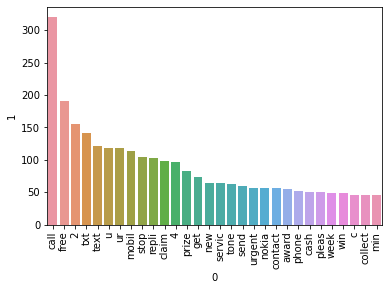

In [45]:
#Và thực hiện vẻ biểu đồ các từ xuất hiện trong email spam , và chỉ lấy 30 từ xuất hiện nhiều nhất
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
#Tương tự với spam_corpus thì em cũng lấy ra các từ xuất hiện trong nội dung email bình thường
ham_corpus = []
for msg  in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:

Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 215,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [48]:
len(ham_corpus)

35402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


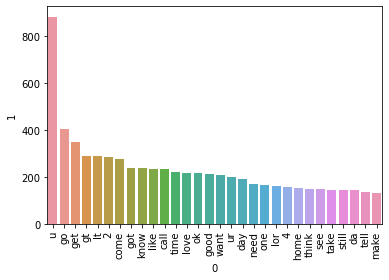

In [42]:
#Và vẽ nó ra thành một biểu đồ với số lượng từ xuất hiện nhiều nhất trong nội dung email bình thường , và chỉ lấy 30 từ 
#xuất hiện nhiều nhất
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [49]:
#Sau đó em sử dụng Countvectorizer để chuyển nội dung văn bản thành các giá trị vector đặc trưng 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [51]:
#Dữ liệu nội dung email
#Dữ liệu nội dung email , em lấy từ cột transform_text , cột này là cột nội dung của email đã qua xử lý
#Và bắt đầu chuyển đổi
X = cv.fit_transform(df['transform_text']).toarray()

In [53]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
#Dữ liệu nhãn
#Dữ liệu nhãn em lấy từ columns target 
y = df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
#Sau đó em sử dụng đối tượng train_test_split để chia dữ liệu train và test
from sklearn.model_selection import train_test_split

In [57]:
#Ở đây em chia dữ liệu train và test làm 2 phần (train 80% và test là 20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
#Sau đó em dụng đối tượng MultinomialNB để train model
from sklearn.naive_bayes import MultinomialNB

In [59]:
#Tạo một đối tượng mnb
mnb = MultinomialNB()

In [60]:
#Bắt đầu train đối tượng với mnb
mnb.fit(X_train,y_train)

MultinomialNB()

In [61]:
#Import các đối tượng cần thiết để tính độ chính xác mô hình , ma trận nhầm lẫn và độ chính xác tích cực
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
#Thu được nhãn từ tập x_test
predict1 = mnb.predict(X_test)

In [63]:
#Tính độ chính xác mô hình với nhãn thu được và nhãn thực tế
print(accuracy_score(y_test,predict1))
#Xuất ra ma trận nhầm lẫn
print(confusion_matrix(y_test,predict1))
#Tính độ chính xác tích cực
print(precision_score(y_test,predict1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [90]:

#Model logicRegression

In [65]:
from sklearn.linear_model import LogisticRegression  

In [66]:
mRegression = LogisticRegression()

In [67]:
mRegression.fit(X_train,y_train)

LogisticRegression()

In [68]:
predict2 = mRegression.predict(X_test)

In [164]:
#Tương tự với model naivebayes thì LogicRegression cũng thực hiện việc train model
#Rồi thu nhãn với tập dữ liệu test , sao đó tính độ chính xác mô hình , ma trận nhầm lẫn , độ chính xác tích cực

In [69]:
print(accuracy_score(y_test,predict2))
print(confusion_matrix(y_test,predict2))
print(precision_score(y_test,predict2))

0.9787234042553191
[[895   1]
 [ 21 117]]
0.9915254237288136


In [70]:
#Model KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

In [71]:
model_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
predict3 = model_KNN.predict(X_test)

In [73]:
print(accuracy_score(y_test,predict3))
print(confusion_matrix(y_test,predict3))
print(precision_score(y_test,predict3))

0.9061895551257253
[[896   0]
 [ 97  41]]
1.0


In [74]:
#Dữ liệu đầu vào
input_text = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [75]:
#Xử lý dữ liệu đầu vào với hàm transform_text ở trên
input_transf = transform_text(input_text)

In [76]:
#Chuyển dữ liệu về dạng vector đặc trưng
input_vector = cv.transform([input_transf])

In [165]:
#Thực hiện phân loại nhãn với 3 model

In [77]:

#Model Naivebayes
result = mnb.predict(input_vector)
if result[0] == 0:
    print('Email này là ham.')
else : 
    print('Email này là spam.')

Email này là ham.


In [78]:
#Model Regression
result = mRegression.predict(input_vector)
if result[0] == 0:
    print('Email này là ham.')
else : 
    print('Email này là spam.')

Email này là ham.


In [79]:
#Model KNN
result = model_KNN.predict(input_vector)
if result[0] == 0:
    print('Email này là ham.')
else : 
    print('Email này là spam.')

Email này là ham.
